In [ ]:
!pip3 install faiss-gpu

     |████████████████████████████████| 89.4MB 90kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install pyyaml easydict
!pip3 install termcolor

In [ ]:
cd /content/drive/MyDrive/Final-Year-Project/SCAN/Unsupervised-Classification/data

/content/drive/MyDrive/Final-Year-Project/SCAN/Unsupervised-Classification/data


In [ ]:
#!gdown 'https://drive.google.com/uc?id=1DNd2F8dm8PaUQiURInwedJYVBbQbAAqW'

Downloading...
From: https://drive.google.com/uc?id=1DNd2F8dm8PaUQiURInwedJYVBbQbAAqW
To: /content/drive/My Drive/Final-Year-Project/SCAN/Unsupervised-Classification/data/F3_struct_dip_smoothed_1_5.segy
1.29GB [00:16, 79.8MB/s]


In [ ]:
!pip install segyio

     |████████████████████████████████| 92kB 2.7MB/s 


In [ ]:
import numpy as np               # well, it's numpy.. powerful array and numerical computation tool (python's matlab)
import matplotlib.pyplot as plt  # well, it's matplotlib.. for data visualization.. plotting
import segyio                    # to easily read segy, but if you got 'abnormal' segy format, I suggest reading it manually (see my other tutorial)
import cv2                       # for image manipulation
import torch                     # pytorch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import albumentations as A                           #for data augmentation
from torch.utils.data import Dataset, DataLoader     #for making a dataset
from sklearn.metrics import f1_score,accuracy_score  #for score metric calculation
from PIL import Image

In [ ]:
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename) as segyfile:
        return segyio.tools.cube(segyfile)

data = segy2numpy('F3_struct_dip_smoothed_1_5.segy').transpose(2, 1, 0)

In [ ]:
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename, xline=181) as segyfile:
        return segyio.tools.cube(segyfile)

In [ ]:
def segy2numpy1(filename: str) -> np.array:
    with segyio.open(filename, iline=189, xline=193) as segyfile:
        return segyio.tools.cube(segyfile)

In [ ]:
data.shape

(462, 951, 651)

In [ ]:
print("xline : ", data.shape[1])
print("inline : ", data.shape[2])
print("sample : ", data.shape[0])

xline :  951
inline :  651
sample :  462


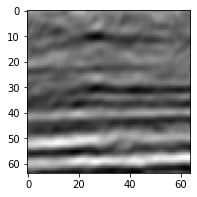

In [ ]:
fig = plt.figure(figsize=(3,3))
plt.imshow(data[62:126, 100:164, 0], cmap='gray')
plt.show()

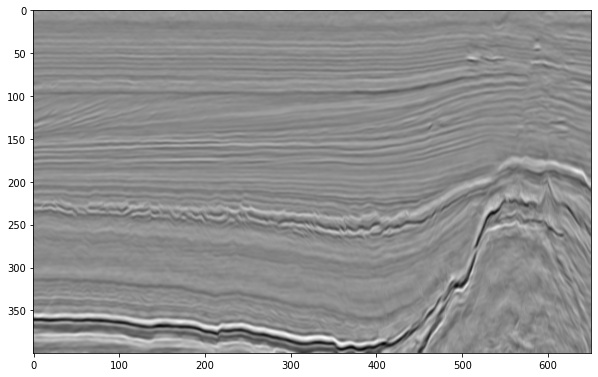

In [ ]:
fig = plt.figure(figsize=(10,100))
plt.imshow(data[62:, 900, :], cmap='gray')
plt.show()

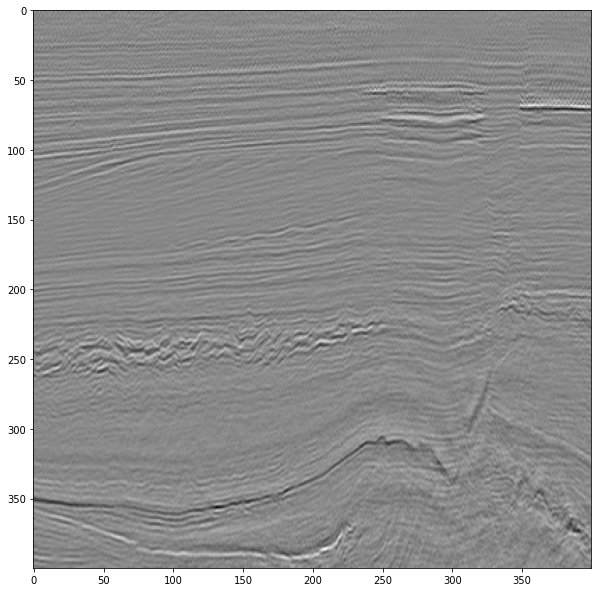

In [ ]:
fig = plt.figure(figsize=(10,100))
plt.imshow(data[62:, 400:800, 0], cmap='gray')
plt.show()

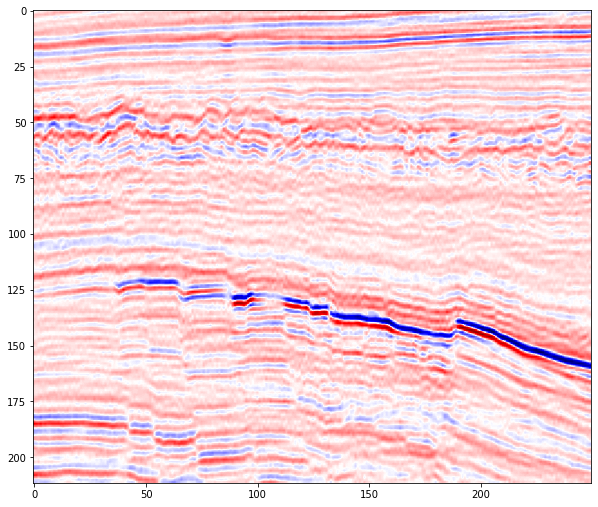

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(data[250:, 7750:8000, 0], cmap='seismic')
plt.show()

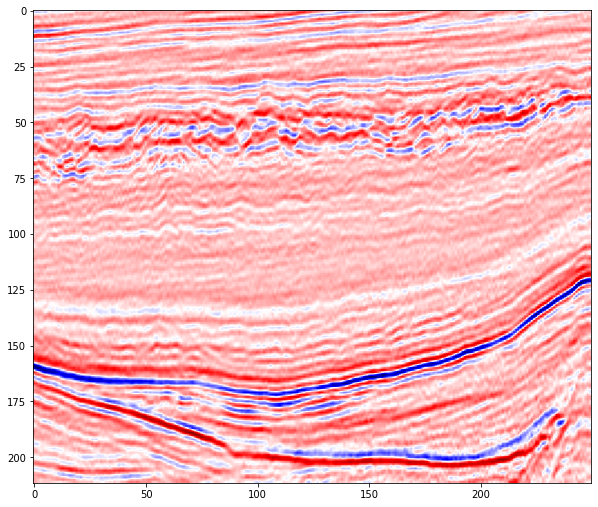

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(data[250:, 8000:8250, 0], cmap='seismic')
plt.show()

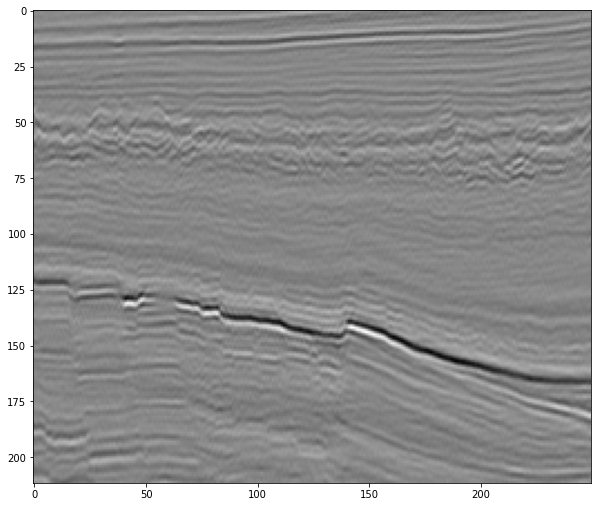

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(data[250:, 8750:9000, 0], cmap='gray')
plt.show()

In [ ]:
data.shape

(462, 619101, 1)

Image extraction by 64*64 (XL x ZL)

In [ ]:
data.shape

(462, 619101, 1)

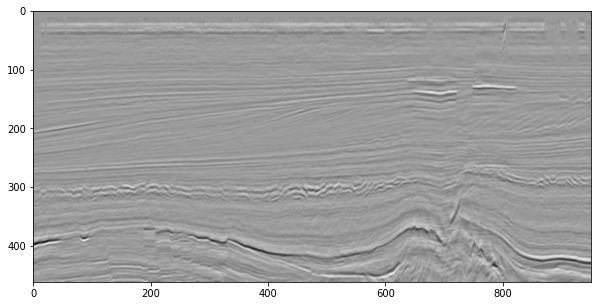

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(data[:, :, 0], cmap='gray')
plt.show()

In [ ]:
data.shape[2]

651

In [ ]:
x = 64
y=64
img_count = 0
#fig = plt.figure(figsize=(10,10))
for IL in range(0, data.shape[2]):
  
  for Z in range(0, data.shape[0], y):
    
    for XL in range(0, data.shape[1], x):
      
      fig = plt.figure(figsize=(1,1))
      img = data[Z:Z+y, XL:XL+x, IL]
      plt.imshow(img, cmap='gray')
      plt.axis('off')
      plt.savefig(f'./64x64/grayscale/Img_{XL}_{XL+x}_{Z}_{Z+y}_{IL}.jpg')
      fig.clear()
      plt.close()
      #name = str(f'Img_{IL}_{XL}.jpg')
      img_count += 1
      if XL == 832:
        print(f'ZLINE {Z+64} completed, images count: {img_count}')
        break
    if Z == 384:
      #print(f'ZLINE {} completed, images count: {img_count}')
      break
      
  print(f'ILINE {IL} completed, images count: {img_count}')

Streaming output truncated to the last 5000 lines.
ILINE 25 completed, images count: 2548
ZLINE 64 completed, images count: 2562
ZLINE 128 completed, images count: 2576
ZLINE 192 completed, images count: 2590
ZLINE 256 completed, images count: 2604
ZLINE 320 completed, images count: 2618
ZLINE 384 completed, images count: 2632
ZLINE 448 completed, images count: 2646
ILINE 26 completed, images count: 2646
ZLINE 64 completed, images count: 2660
ZLINE 128 completed, images count: 2674
ZLINE 192 completed, images count: 2688
ZLINE 256 completed, images count: 2702
ZLINE 320 completed, images count: 2716
ZLINE 384 completed, images count: 2730
ZLINE 448 completed, images count: 2744
ILINE 27 completed, images count: 2744
ZLINE 64 completed, images count: 2758
ZLINE 128 completed, images count: 2772
ZLINE 192 completed, images count: 2786
ZLINE 256 completed, images count: 2800
ZLINE 320 completed, images count: 2814
ZLINE 384 completed, images count: 2828
ZLINE 448 completed, images count: 

In [ ]:
pwd

'/content/drive/My Drive/Final-Year-Project/SCAN/Unsupervised-Classification/data'

In [ ]:
import os
files = os.listdir('./64x64/grayscale')
len(files)

63798

In [ ]:
files[49452:]

['Img_768_832_384_448_44.jpg',
 'Img_832_896_384_448_44.jpg',
 'Img_0_64_0_64_45.jpg',
 'Img_64_128_0_64_45.jpg',
 'Img_128_192_0_64_45.jpg',
 'Img_192_256_0_64_45.jpg',
 'Img_256_320_0_64_45.jpg',
 'Img_320_384_0_64_45.jpg',
 'Img_384_448_0_64_45.jpg',
 'Img_448_512_0_64_45.jpg',
 'Img_512_576_0_64_45.jpg',
 'Img_576_640_0_64_45.jpg',
 'Img_640_704_0_64_45.jpg',
 'Img_704_768_0_64_45.jpg',
 'Img_768_832_0_64_45.jpg',
 'Img_832_896_0_64_45.jpg',
 'Img_0_64_64_128_45.jpg',
 'Img_64_128_64_128_45.jpg',
 'Img_128_192_64_128_45.jpg',
 'Img_192_256_64_128_45.jpg']

In [ ]:
edited_files = []

x = 64
y=64
img_count = 0
#fig = plt.figure(figsize=(10,10))
for IL in range(0, data.shape[2]):
  
  for Z in range(0, data.shape[0], y):
    
    for XL in range(0, data.shape[1], x):
      
      file_name = str(f'Img_{XL}_{XL+x}_{Z}_{Z+y}_{IL}.jpg')
      edited_files.append(file_name)
      img_count += 1
      if XL == 832:
        print(f'ZLINE {Z+64} completed, images count: {img_count}')
        break
    if Z == 384:
      #print(f'ZLINE {} completed, images count: {img_count}')
      break
      
  print(f'ILINE {IL} completed, images count: {img_count}')

Streaming output truncated to the last 5000 lines.
ZLINE 64 completed, images count: 2562
ZLINE 128 completed, images count: 2576
ZLINE 192 completed, images count: 2590
ZLINE 256 completed, images count: 2604
ZLINE 320 completed, images count: 2618
ZLINE 384 completed, images count: 2632
ZLINE 448 completed, images count: 2646
ILINE 26 completed, images count: 2646
ZLINE 64 completed, images count: 2660
ZLINE 128 completed, images count: 2674
ZLINE 192 completed, images count: 2688
ZLINE 256 completed, images count: 2702
ZLINE 320 completed, images count: 2716
ZLINE 384 completed, images count: 2730
ZLINE 448 completed, images count: 2744
ILINE 27 completed, images count: 2744
ZLINE 64 completed, images count: 2758
ZLINE 128 completed, images count: 2772
ZLINE 192 completed, images count: 2786
ZLINE 256 completed, images count: 2800
ZLINE 320 completed, images count: 2814
ZLINE 384 completed, images count: 2828
ZLINE 448 completed, images count: 2842
ILINE 28 completed, images count: 

In [ ]:
edited_files = []
x = 64

for IL in range(62, data.shape[0], x):
  
  for XL in range(0, data.shape[1], x):

    file_name = f'Img_{IL}_{XL}.jpg'
    edited_files.append(file_name)

    if XL > 619100:
      print(f'INLINE loop completed, images count: {img_count}')
      break

  if IL > 462:
    print(f'INLINE loop completed, images count: {img_count}')
    break

In [ ]:
len(edited_files)

63798

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['Names'] = edited_files; df

,Names
0,Img_0_64_0_64_0.jpg
1,Img_64_128_0_64_0.jpg
2,Img_128_192_0_64_0.jpg
3,Img_192_256_0_64_0.jpg
4,Img_256_320_0_64_0.jpg
...,...
63793,Img_576_640_384_448_650.jpg
63794,Img_640_704_384_448_650.jpg
63795,Img_704_768_384_448_650.jpg
63796,Img_768_832_384_448_650.jpg


In [ ]:
df.to_csv('./64x64/file_names.csv', index=False)

In [ ]:
unfound_files = []

for file in edited_files:
  if file not in files:
    unfound_files.append(file)

In [ ]:
len(unfound_files)

0

In [ ]:
unfound_files

[]